## DNA Sequencing Pre-Processing

By: Sk. Tanzir Mehedi

1. Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.feature_extraction.text import CountVectorizer

2. Load DNA sequence data

In [ ]:
data = pd.read_table('sequencesLabels.txt')
data.head()

,sequences,class
0,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,0
1,GATTTAAGTGAATAGCTTGGCTATCTCACTTTCCCTCGTTCTCTTG...,1
2,GATTTAAGTGAATAGCTTGGCTATCTCACTTTCCCTCGTTCTCTTG...,1
3,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,1
4,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,1


3. Load full dataset

In [ ]:
data

,sequences,class
0,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,0
1,GATTTAAGTGAATAGCTTGGCTATCTCACTTTCCCTCGTTCTCTTG...,1
2,GATTTAAGTGAATAGCTTGGCTATCTCACTTTCCCTCGTTCTCTTG...,1
3,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,1
4,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,1
...,...,...
548,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,1
549,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,1
550,TAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATC...,1
551,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...,1


4. Load dataset overview

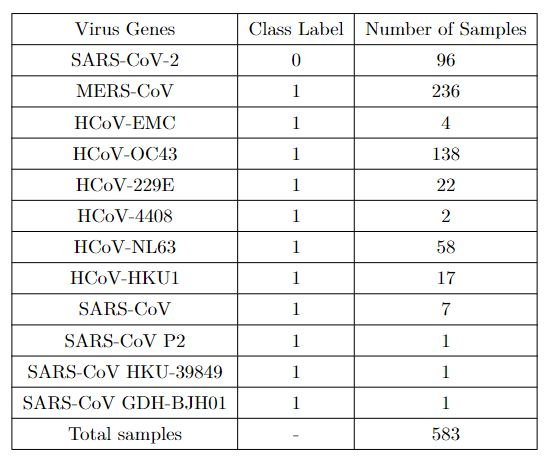

In [ ]:
Image("DataOverview.JPG")

5. Select window size and convert to lowaercase

In [ ]:
def getKmers(sequences, size=3):
    return [sequences[x:x+size].lower() for x in range(len(sequences) - size + 1)]

6. Now convert data sequences into short overlapping k-mers of legth 3 using getKmers function.

In [ ]:
data['words'] = data.apply(lambda x: getKmers(x['sequences']), axis=1)
data = data.drop('sequences', axis=1)

In [ ]:
data

,class,words
0,0,"[att, tta, taa, aaa, aag, agg, ggt, gtt, ttt, ..."
1,1,"[gat, att, ttt, tta, taa, aag, agt, gtg, tga, ..."
2,1,"[gat, att, ttt, tta, taa, aag, agt, gtg, tga, ..."
3,1,"[gat, att, ttt, tta, taa, aag, agt, gtg, tga, ..."
4,1,"[gat, att, ttt, tta, taa, aag, agt, gtg, tga, ..."
...,...,...
548,1,"[att, tta, taa, aaa, aag, agg, ggt, gtt, ttt, ..."
549,1,"[att, tta, taa, aaa, aag, agg, ggt, gtt, ttt, ..."
550,1,"[taa, aaa, aag, agg, ggt, gtt, ttt, tta, tat, ..."
551,1,"[cag, agg, ggt, gta, taa, aac, aca, caa, aaa, ..."


### Now, coding sequence data is changed to lowercase, split up into all possible k-mer words of length 3 and ready for the next step.

7. Convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels.

In [ ]:
texts = list(data['words'])
for item in range(len(texts)):
    texts[item] = ' '.join(texts[item])
y_data = data.iloc[:, 0].values                         

In [ ]:
y_data

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(texts[1])

gat att ttt tta taa aag agt gtg tga gaa aat ata tag agc gct ctt ttg tgg ggc gct cta tat atc tct ctc tca cac act ctt ttt ttc tcc ccc cct ctc tcg cgt gtt ttc tct ctc tct ctt ttg tgc gca cag aga gaa aac act ctt ttt ttg tga gat att ttt ttt tta taa aac acg cga gaa aac act ctt tta taa aaa aat ata taa aaa aaa aag agc gcc ccc cct ctg tgt gtt ttg tgt gtt ttt tta tag agc gcg cgt gta tat att ttg tgt gtt ttg tgc gca cac act ctt ttg tgt gtc tct ctg tgg ggt gtg tgg ggg gga gat att ttg tgt gtg tgg ggc gca cac act cta taa aat atc tct ctg tgc gcc cct ctg tgc gct ctc tca cat atc tct cta tag agg ggc gca cag agt gtg tgg gga gac aca cat ata tat atg tgc gct ctc tca caa aac aca cac act ctg tgg ggg ggt gta tat ata taa aat att ttc tct cta taa aat att ttg tga gaa aat ata tac act cta tat att ttt ttt ttt ttc tca cag agt gtt tta tag aga gag agc gcg cgt gtc tcg cgt gtg tgt gtc tct ctc tct ctt ttg tgt gta tac acg cgt gtc tct ctc tcg cgg ggt gtc tca cac aca caa aat ata tat ata tac acg cgg ggt gtt ttt ttc tcg cgt gtc 

8. Now apply the BAG of WORDS using CountVectorizer using NLP

In [ ]:
cv = CountVectorizer(ngram_range=(2,2))
X = cv.fit_transform(texts)

In [ ]:
cv

CountVectorizer(ngram_range=(2, 2))

In [ ]:
X

<553x1172 sparse matrix of type '<class 'numpy.int64'>'
	with 143022 stored elements in Compressed Sparse Row format>

In [ ]:
print(X.shape)

(553, 1172)


9. Check class distributation of the dataset

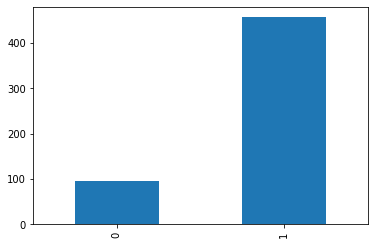

In [ ]:
data['class'].value_counts().sort_index().plot.bar()

10. Dictionary representation of One-hot 2D vector representation of generated DNA sequence words with region size = 2

In [ ]:
seqs = texts
CHARS = 'ACGT'
CHARS_COUNT = len(CHARS)

maxlen = max(map(len, seqs))
res = np.zeros((len(seqs), CHARS_COUNT * maxlen), dtype=np.uint8)

for si, seq in enumerate(seqs):
    seqlen = len(seq)
    arr = np.chararray((seqlen,), buffer=seq)
    for ii, char in enumerate(CHARS):
        res[si][ii*seqlen:(ii+1)*seqlen][arr == char] = 1

In [ ]:
res

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
res.shape

(553, 496428)

11. Print full 2-D vector

In [ ]:
np.set_printoptions(threshold=100000000)
print(res)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
df = pd.DataFrame(res)
df

,0,1,2,3,4,5,6,7,8,9,...,496418,496419,496420,496421,496422,496423,496424,496425,496426,496427
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


12. Write the pre-processed dataset on our disk for further steps.

In [ ]:
file = open("sample.txt", "w+")
content = str(res)
file.write(content)
file.close()

#TML Implementation 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

1. Splitting the dataset into the training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(442, 6222)
(111, 6222)


2. A multinomial naive Bayes classifier will be created.  I previously did some parameter tuning and found the ngram size of 2 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best (the alpha parameter was determined by grid search previously)

In [ ]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

3. Define the classifier

In [ ]:
y_pred = classifier.predict(X_test)

4. Check the prformance metrices 

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("Accuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nF1-Score = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1
Actual           
0          16   1
1          27  67
accuracy = 0.748 
precision = 0.891 
recall = 0.748 
f1 = 0.782
